# NVIDIA STOCK MARKET PREDICTION
This is a simple stock market prediction application with Yahoo Finance data and Machine Learning.

In [63]:
import yfinance as yf

## EDA

In [64]:
# Selecting the stock ticker
stock_data = yf.Ticker("NVDA")

# Getting all data since the creation of the index
stock_data = stock_data.history(period="max")

stock_data.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.040119,0.044775,0.035581,0.037612,2714688000,0.0,0.0
1999-01-25 00:00:00-05:00,0.040597,0.042029,0.037612,0.041552,510480000,0.0,0.0
1999-01-26 00:00:00-05:00,0.042029,0.042865,0.037731,0.038328,343200000,0.0,0.0
1999-01-27 00:00:00-05:00,0.038447,0.039403,0.036298,0.038209,244368000,0.0,0.0
1999-01-28 00:00:00-05:00,0.038209,0.038447,0.037850,0.038089,227520000,0.0,0.0
1999-01-29 00:00:00-05:00,0.038089,0.038209,0.036298,0.036298,244032000,0.0,0.0
1999-02-01 00:00:00-05:00,0.036298,0.037253,0.036298,0.037015,154704000,0.0,0.0
1999-02-02 00:00:00-05:00,0.036298,0.037253,0.033074,0.034149,264096000,0.0,0.0
1999-02-03 00:00:00-05:00,0.033671,0.035343,0.033432,0.034865,75120000,0.0,0.0


In [65]:
stock_data.index

DatetimeIndex(['1999-01-22 00:00:00-05:00', '1999-01-25 00:00:00-05:00',
               '1999-01-26 00:00:00-05:00', '1999-01-27 00:00:00-05:00',
               '1999-01-28 00:00:00-05:00', '1999-01-29 00:00:00-05:00',
               '1999-02-01 00:00:00-05:00', '1999-02-02 00:00:00-05:00',
               '1999-02-03 00:00:00-05:00', '1999-02-04 00:00:00-05:00',
               ...
               '2025-05-13 00:00:00-04:00', '2025-05-14 00:00:00-04:00',
               '2025-05-15 00:00:00-04:00', '2025-05-16 00:00:00-04:00',
               '2025-05-19 00:00:00-04:00', '2025-05-20 00:00:00-04:00',
               '2025-05-21 00:00:00-04:00', '2025-05-22 00:00:00-04:00',
               '2025-05-23 00:00:00-04:00', '2025-05-27 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=6627, freq=None)

<Axes: xlabel='Date'>

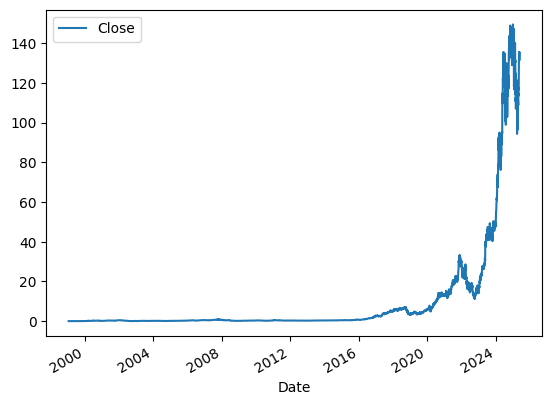

In [66]:
stock_data.plot.line(y="Close", use_index=True)

In [67]:
# Deleting columns that have no use for the model
del stock_data["Dividends"]
del stock_data["Stock Splits"]

## Feature Engineering
In this section of the code will be done some feature engineering to get:

1. Target column that will status of the stock, if it increased or not, based in the comparison of close value of tomorrow data with the actual data;

In [68]:
stock_data["Tomorrow"] = stock_data["Close"].shift(-1)
stock_data

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1999-01-22 00:00:00-05:00,0.040119,0.044775,0.035581,0.037612,2714688000,0.041552
1999-01-25 00:00:00-05:00,0.040597,0.042029,0.037612,0.041552,510480000,0.038328
1999-01-26 00:00:00-05:00,0.042029,0.042865,0.037731,0.038328,343200000,0.038209
1999-01-27 00:00:00-05:00,0.038447,0.039403,0.036298,0.038209,244368000,0.038089
1999-01-28 00:00:00-05:00,0.038209,0.038447,0.037850,0.038089,227520000,0.036298
...,...,...,...,...,...,...
2025-05-20 00:00:00-04:00,134.289993,134.580002,132.619995,134.380005,161514200,131.800003
2025-05-21 00:00:00-04:00,133.059998,137.399994,130.589996,131.800003,270608700,132.830002
2025-05-22 00:00:00-04:00,132.229996,134.250000,131.550003,132.830002,187344000,131.289993


In [69]:
stock_data["Target"] = (stock_data["Tomorrow"] > stock_data["Close"]).astype(int)
stock_data.head(10)

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.040119,0.044775,0.035581,0.037612,2714688000,0.041552,1
1999-01-25 00:00:00-05:00,0.040597,0.042029,0.037612,0.041552,510480000,0.038328,0
1999-01-26 00:00:00-05:00,0.042029,0.042865,0.037731,0.038328,343200000,0.038209,0
1999-01-27 00:00:00-05:00,0.038447,0.039403,0.036298,0.038209,244368000,0.038089,0
1999-01-28 00:00:00-05:00,0.038209,0.038447,0.037850,0.038089,227520000,0.036298,0
1999-01-29 00:00:00-05:00,0.038089,0.038209,0.036298,0.036298,244032000,0.037015,1
1999-02-01 00:00:00-05:00,0.036298,0.037253,0.036298,0.037015,154704000,0.034149,0
1999-02-02 00:00:00-05:00,0.036298,0.037253,0.033074,0.034149,264096000,0.034865,1
1999-02-03 00:00:00-05:00,0.033671,0.035343,0.033432,0.034865,75120000,0.036775,1


## Machine Learning

In [70]:
from sklearn.ensemble import RandomForestClassifier
# With bigger n_estimatores values accuracy is increased.
# min_samples_split helps against overfitting but it cost accuracy.
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# The train-test split will be done with all rows except the last 100 in the training set, and the last 100 rows will be in the test set.
# This has to be done to prevent data leakage.

train = stock_data.iloc[:-100]
test = stock_data.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [71]:
from sklearn.metrics import precision_score

# Precision Score is an appropriate metric in this case because it measures how often our positive predictions are correct.
preds = model.predict(test[predictors])

In [72]:
import pandas as pd
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5131578947368421

### Improving the Model

In [73]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

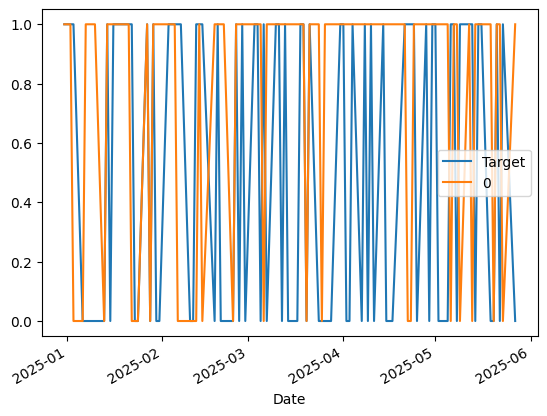

In [74]:
combined.plot()

### Building Backtesting System

In [75]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [76]:
# 2500 equals to 10 years of stock data
# 250 equals to 1 year of stock data

def backtest(data, model, predictors, start=2500, step=250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    # All of the years prier to the current year
    train = data.iloc[0:i].copy()
    # The current year
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [77]:
predictions = backtest(stock_data, model, predictors)

In [78]:
predictions["Predictions"].value_counts()

,count
Predictions,
0,2363
1,1764


In [79]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5226757369614512

In [80]:
predictions["Target"].value_counts() / predictions.shape[0]

,count
Target,
1,0.529683
0,0.470317


### Additional Predictors

In [81]:
# Days prior to the actual day
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
  rolling_averages = stock_data.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  stock_data[ratio_column] = stock_data["Close"] / rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  stock_data[trend_column] = stock_data.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]

In [82]:
stock_data = stock_data.dropna()
stock_data

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2003-01-15 00:00:00-05:00,0.094527,0.095292,0.091547,0.091547,904584000,0.085357,0,0.984386,1.0,0.979717,3.0,0.906372,32.0,0.453885,104.0,0.474865,470.0
2003-01-16 00:00:00-05:00,0.090171,0.091318,0.084135,0.085357,2039976000,0.082148,0,0.965011,0.0,0.928511,2.0,0.844110,31.0,0.426599,104.0,0.442657,469.0
2003-01-17 00:00:00-05:00,0.083065,0.084211,0.081078,0.082148,1058832000,0.080084,0,0.980839,0.0,0.918331,1.0,0.812207,30.0,0.413812,104.0,0.425916,469.0
2003-01-21 00:00:00-05:00,0.083676,0.085434,0.079855,0.080084,967356000,0.080161,1,0.987282,0.0,0.923510,1.0,0.792346,29.0,0.406730,103.0,0.415128,469.0
2003-01-22 00:00:00-05:00,0.079855,0.082225,0.079626,0.080161,550992000,0.082377,1,1.000481,1.0,0.955902,1.0,0.793079,30.0,0.410637,103.0,0.415437,470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-19 00:00:00-04:00,132.389999,135.869995,132.389999,135.570007,193154600,134.380005,0,1.000627,2.0,1.010103,4.0,1.185726,31.0,1.089570,133.0,2.424970,536.0
2025-05-20 00:00:00-04:00,134.289993,134.580002,132.619995,134.380005,161514200,131.800003,0,0.995592,1.0,0.994641,3.0,1.174614,31.0,1.078632,132.0,2.398591,535.0
2025-05-21 00:00:00-04:00,133.059998,137.399994,130.589996,131.800003,270608700,132.830002,1,0.990307,0.0,0.980684,2.0,1.151193,31.0,1.056687,131.0,2.347664,535.0


### More Improving To The Model

In [83]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [84]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1]
  # Threshold of 60%
  preds[preds >= .6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [85]:
# We use the new predictors because ratio-based features capture relative market dynamics more effectively than absolute raw values.

predictions = backtest(stock_data, model, new_predictors)
predictions["Predictions"].value_counts()

,count
Predictions,
0.0,2852
1.0,274


In [86]:
precision_score(predictions["Target"], predictions["Predictions"])

0.572992700729927

## Conclusions

A precision score of 0.57 is reasonable in this context, and only in this context, given that we're using data from 2000 to today, and there are more improvements and data to be included in the model to obtain actual results.

So for real-world investing or trading, this model performs poorly.